# Лабораторная работа №9

## Вариант 7

In [1]:
from scipy import stats as sts
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import log2
import seaborn as sns
%matplotlib inline

## Задание 1

In [2]:
df = pd.read_csv("Lab_09/Вариант_7.csv", sep=';')
df.head()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by Corcoran Park Slope,House for sale,825000,2,2.0,1820.000000,1666 73rd St,"Brooklyn, NY 11204","1666 73rd StBrooklyn, NY 11204",United States,New York,Kings County,Brooklyn,73rd Street,"1666 73rd St, Brooklyn, NY 11204, USA",40.616317,-73.998165
1,Brokered by JOSK REALTY LLC,Multi-family home for sale,599999,6,2.0,3490.000000,919 Crescent St,"Brooklyn, NY 11208","919 Crescent StBrooklyn, NY 11208",United States,New York,Kings County,Brooklyn,Crescent Street,"919 Crescent St., Brooklyn, NY 11208, USA",40.664930,-73.867072
2,Brokered by Corcoran East Side,Townhouse for sale,10999000,5,7.0,2184.207862,132 W 81st St,"New York, NY 10024","132 W 81st StNew York, NY 10024",United States,New York,New York County,New York,West 81st Street,"132 W 81st St, New York, NY 10024, USA",40.783621,-73.975944
3,Brokered by TREBACH REALTY INC,House for sale,2750000,4,NaN,2184.207862,4570 Delafield Ave,"Bronx, NY 10471","4570 Delafield AveBronx, NY 10471",United States,New York,Bronx County,The Bronx,Delafield Avenue,"4570 Delafield Ave, Bronx, NY 10471, USA",40.893055,-73.906742
4,Brokered by BHHS Fillmore R.E.,House for sale,649000,3,2.0,1064.000000,2051 E 73rd St,"Brooklyn, NY 11234","2051 E 73rd StBrooklyn, NY 11234",United States,New York,Kings County,Brooklyn,East 73rd Street,"2051 E 73rd St, Brooklyn, NY 11234, USA",40.621503,-73.906637


Описание признаков:

1. Количественные признаки:
    
    BEDS: количество спален  
    BATH: количество ванных комнат  
    PROPERTYSQFT: площадь объекта недвижимости  
    LATITUDE: широта координат дома  
    LONGITUDE: долгота координат дома  
    PRICE: цена дома   

2. Качественные признаки:  

    BROKERTITLE: название агенства недвижиимости  
    TYPE: тип строения  
    ADDRESS: полный адрес дома  
    STATE: местонахождение  
    MAIN_ADDRESS: главная информация об адресе  
    ADMINISTRATIVE_AREA_LEVEL_2: Информация об административном районе 2-го уровня  
    LOCALITY: населенный пункт  
    SUBLOCALITY: район  
    STREET_NAME: район  
    LONG_NAME: название улицы   
    FORMATTED_ADDRESS: форматированный адрес  

In [3]:
print(f"Размерность: {df.shape}")
df.info()

Размерность: (500, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  500 non-null    object 
 1   TYPE                         500 non-null    object 
 2   PRICE                        500 non-null    int64  
 3   BEDS                         500 non-null    int64  
 4   BATH                         461 non-null    float64
 5   PROPERTYSQFT                 500 non-null    float64
 6   ADDRESS                      500 non-null    object 
 7   STATE                        500 non-null    object 
 8   MAIN_ADDRESS                 500 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  461 non-null    object 
 10  LOCALITY                     500 non-null    object 
 11  SUBLOCALITY                  500 non-null    object 
 12  STREET_NAME                  500 non-null    object 
 1

Пропуски значений присутствуют в колонках:
BATH - колличественный дискретный неупорядоченный признак
ADMINISTRATIVE_AREA_LEVEL_2 - номинальный дискретный неупорядоченный признак
LATITUDE - непрерывный неупорядоченный признак (абсолютная шкала)
LONGITUDE - непрерывный неупорядоченный признак (абсолютная шкала)

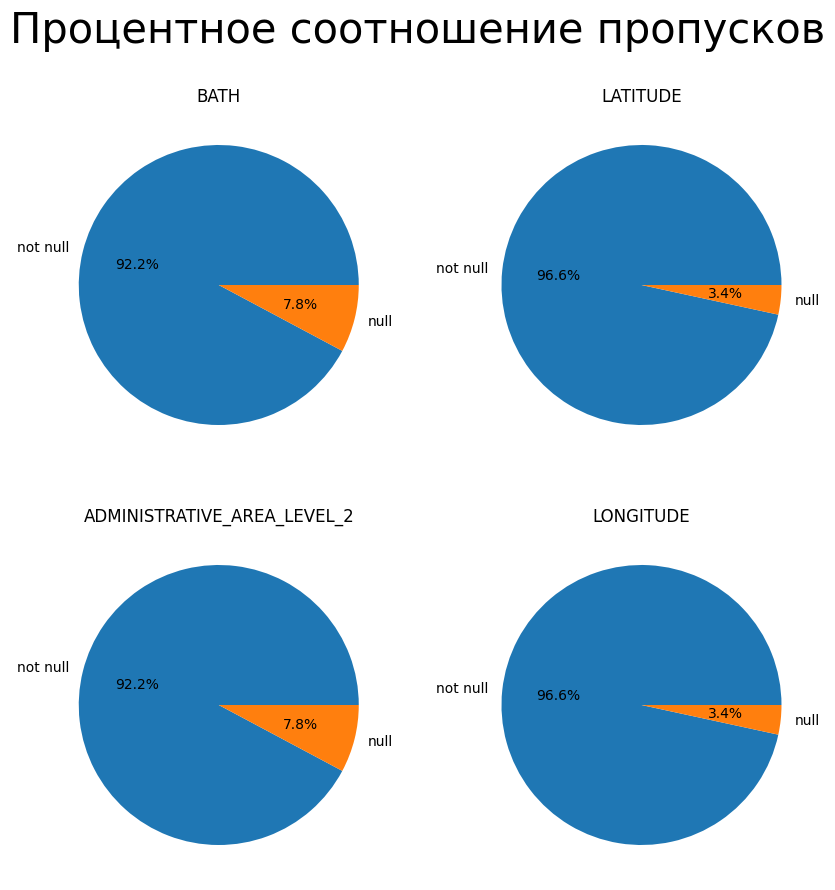

In [4]:
features = ["BATH", "ADMINISTRATIVE_AREA_LEVEL_2", "LATITUDE", "LONGITUDE"]


labels = "not null", "null"
fig, ax = plt.subplots(2, 2)
    
fig.set_size_inches(10, 10)
fig.suptitle("Процентное соотношение пропусков", fontsize=30)
for i, column_name in enumerate(features):
    null_sum = df[column_name].isna().sum() 
    not_null_summ = len(df[column_name]) - null_sum
    sizes = [not_null_summ, null_sum]
    ax[i%2][i//2].pie(sizes, labels=labels, autopct='%1.1f%%')
    ax[i%2][i//2].set_title(column_name)    

Для всех исследуемых признаков процент пропусков составляет не более 8%. Это значит, что пропущенных значений слишком много для того, чтобы удалять строки с пропущенными значениями - такое удаление может сказаться на результатах исследования. Но, при этом, пропущенных значений не так много, чтобы мы поссле восстановления не могли использовать данные для анализа.  

В результате оценки соотношения пропущенных значений к общему объёму данных, следует восстановить пропущенные значения.

Признаки "LATITUDE", "LONGITUDE" имеют одинаковое процентное соотношщение пропущенных значений. Возможно, пропуски этих признаков связаны.

In [5]:
cnt = df[(df['LATITUDE'].isnull())&(df['LONGITUDE'].isnull())].shape[0]
print('Число совместного появления пропусков в обоих столбцах', cnt)
cnt1 = df[(df['LATITUDE'].isnull())&(df['LONGITUDE'].notnull())].shape[0]
print('Число появления пропусков только в столбце "LATITUDE"', cnt1)
cnt2 = df[(df['LATITUDE'].notnull())&(df['LONGITUDE'].isnull())].shape[0]
print('Число появления пропусков только в столбце "LONGITUDE"', cnt2)

Число совместного появления пропусков в обоих столбцах 17
Число появления пропусков только в столбце "LATITUDE" 0
Число появления пропусков только в столбце "LONGITUDE" 0


В 17 строках мы не значем ни широту, ни долготу координат дома. Пропуски значений в этих признаках связаны - неизвестны координаты дома. 

C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\1493863732.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)
C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\1493863732.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)
C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\1493863732.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


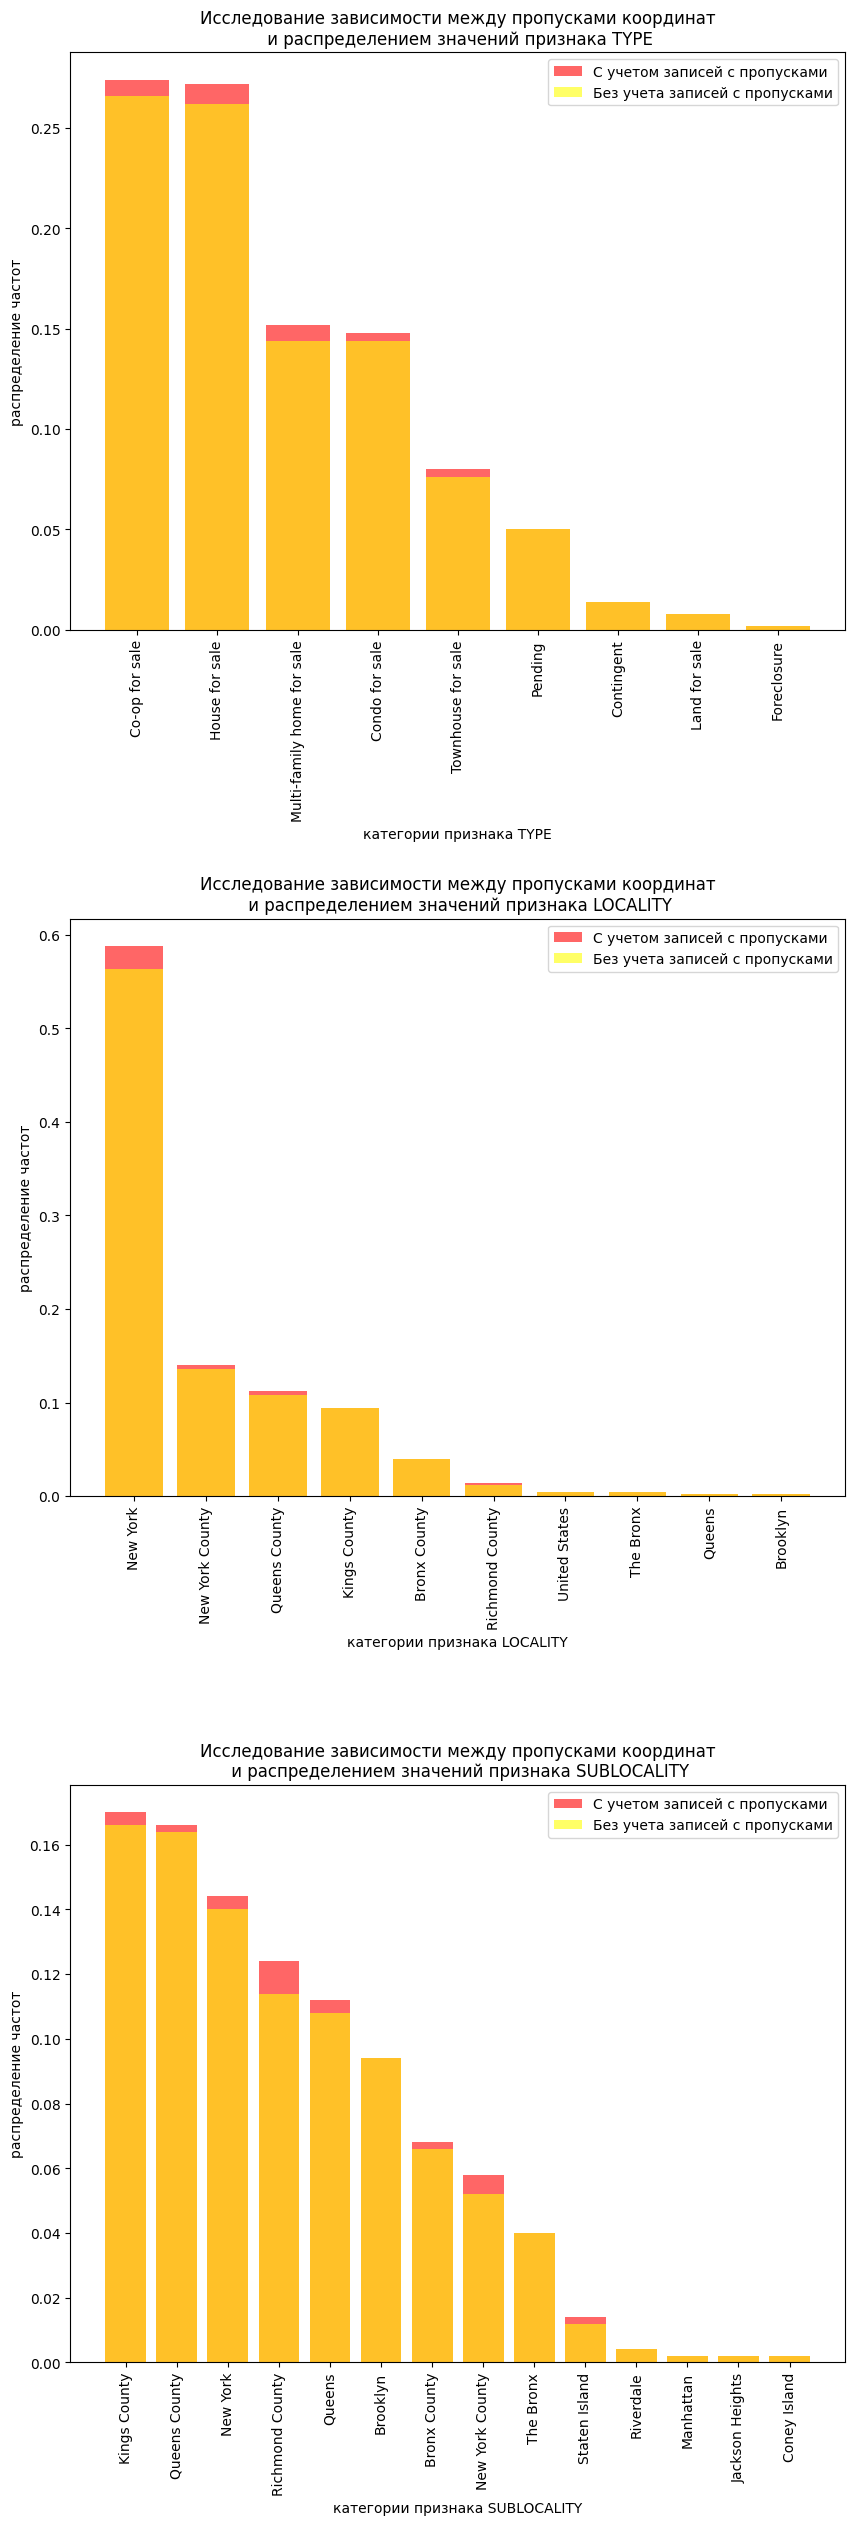

In [6]:
x_names = ["TYPE", "LOCALITY", "SUBLOCALITY"]

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10, 30)
fig.subplots_adjust(wspace=1, hspace=0.5)
for i, x_name in enumerate(x_names):
    with_null = df[x_name].value_counts()/df.shape[0]
    without_null = df[df['LATITUDE'].notnull()][x_name].value_counts()/df.shape[0]
    x = with_null.keys()
    ax[i].bar(x, with_null, label='С учетом записей с пропусками', alpha=0.6, color="red")
    x = without_null.keys()
    ax[i].bar(x, without_null, label='Без учета записей с пропусками', alpha=0.6, color="yellow")
    ax[i].set_title(f"Исследование зависимости между пропусками координат\n и распределением значений признака {x_name}")
    ax[i].set_xlabel(f"категории признака {x_name}")
    ax[i].set_ylabel("распределение частот")
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].legend()


Можно наблюдать примерно одинаковое количество пропусков в доминирующих категориях и отсутствие пропусков координат в малых категориях. Вероятно, в малых категориях пропуски отсутствуют, из-за того, что в них слишком мало значений, для того чтобы мы могли найти в них отсутствующие.  

Вывод: пропуски координат не зависят от значений категориальных признаков "TYPE", "LOCALITY", "SUBLOCALITY".

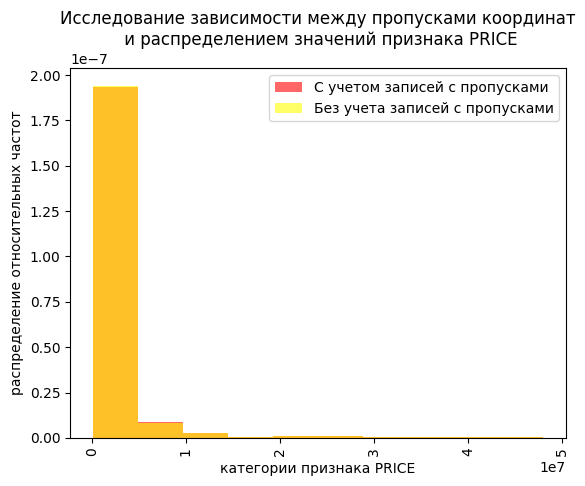

In [7]:
x_name = "PRICE"
with_null = df[x_name]
without_null = df[df['LATITUDE'].notnull()][x_name]

plt.hist(with_null, label='С учетом записей с пропусками', alpha=0.6, color="red", density=True)
plt.hist(without_null, label='Без учета записей с пропусками', alpha=0.6, color="yellow", density=True)
plt.title(f"Исследование зависимости между пропусками координат\n и распределением значений признака {x_name}")
plt.xlabel(f"категории признака {x_name}")
plt.ylabel("распределение относительных частот")
plt.xticks(rotation=90)
plt.legend()

Можно наблюдать примерно одинаковое распределение пропусков значений координат для любых ценовых диапазонов.

Выводы: 
- Пропуски в столбцах "LATITUDE", "LONGITUDE" появляются только совместно.
- Явная зависимость между пропусками в этих столбцах и распределением значений признаков в столбцах "TYPE", "LOCALITY", "SUBLOCALITY" не просматривается; изменения распределения значений столбца "PRICE", тоже нет. Пропуски являются несущественными.
- Из двух предыдущих пунктов: скорее всего, причиной пропусков являются технические проблемы, следовательно, эти пропуски можно отнести к категории совершенно случайных.
- Количество пропусков в этих столбцах 3.4% от общего числа записей.
- С учетом всех пунктов, допустимой стратегией обработки пропусков является удаление записей с пропускам в столбцах "LATITUDE", "LONGITUDE" (17 записей)*.

*Однако, если нас не устраивает ситуация потери 3% данных выборки, то, можно применить такие методы обработки пропусков:  

1. Положение дома определяет координаты, следовательно зная полный адрес можно восстановить координаты дома. Используя методы поиска  в открытых источниках (OSINT) таких как google maps, яндекс карты, 2gis... можно по полному адресу восстановить точные координаты дома. Если пропущенных значений немного, можно выполнить это вручную. Если пропущенных значений много, то можно написать соотвутствующую функцию.  
    
2. Другой метод. Представим, что нам не известен полный адрес, а известна только лишь улица/район. Тогда группируем непропущенные данные по улице/району и заменяем пропущенные данные медианным значение для данной улицы/района. Медиану следует выбрать, т.к. улицы бывают достаточно длинные, возможны выбросы, а медиана не зависит от выбросов.

Теперь к признакам "BATH", "ADMINISTRATIVE_AREA_LEVEL_2". Они тоже имеют одинаковый процент пропусков. Проверим связь пропусков.

In [8]:
cnt = df[(df['BATH'].isnull())&(df['ADMINISTRATIVE_AREA_LEVEL_2'].isnull())].shape[0]
print('Число совместного появления пропусков в обоих столбцах', cnt)
cnt1 = df[(df['BATH'].isnull())&(df['ADMINISTRATIVE_AREA_LEVEL_2'].notnull())].shape[0]
print('Число появления пропусков только в столбце "BATH"', cnt1)
cnt2 = df[(df['BATH'].notnull())&(df['ADMINISTRATIVE_AREA_LEVEL_2'].isnull())].shape[0]
print('Число появления пропусков только в столбце "ADMINISTRATIVE_AREA_LEVEL_2"', cnt2)

Число совместного появления пропусков в обоих столбцах 0
Число появления пропусков только в столбце "BATH" 39
Число появления пропусков только в столбце "ADMINISTRATIVE_AREA_LEVEL_2" 39


В 39 строках мы не значем ни кличетво ванных комнат, ни административный район дома. Пропуски значений в этих признаках могут быть связаны, но интерпритация этой связи мне не понятна.

C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\3125898328.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)
C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\3125898328.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)
C:\Users\J0hn_Lenin\AppData\Local\Temp\ipykernel_19104\3125898328.py:16: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(x, rotation=90)


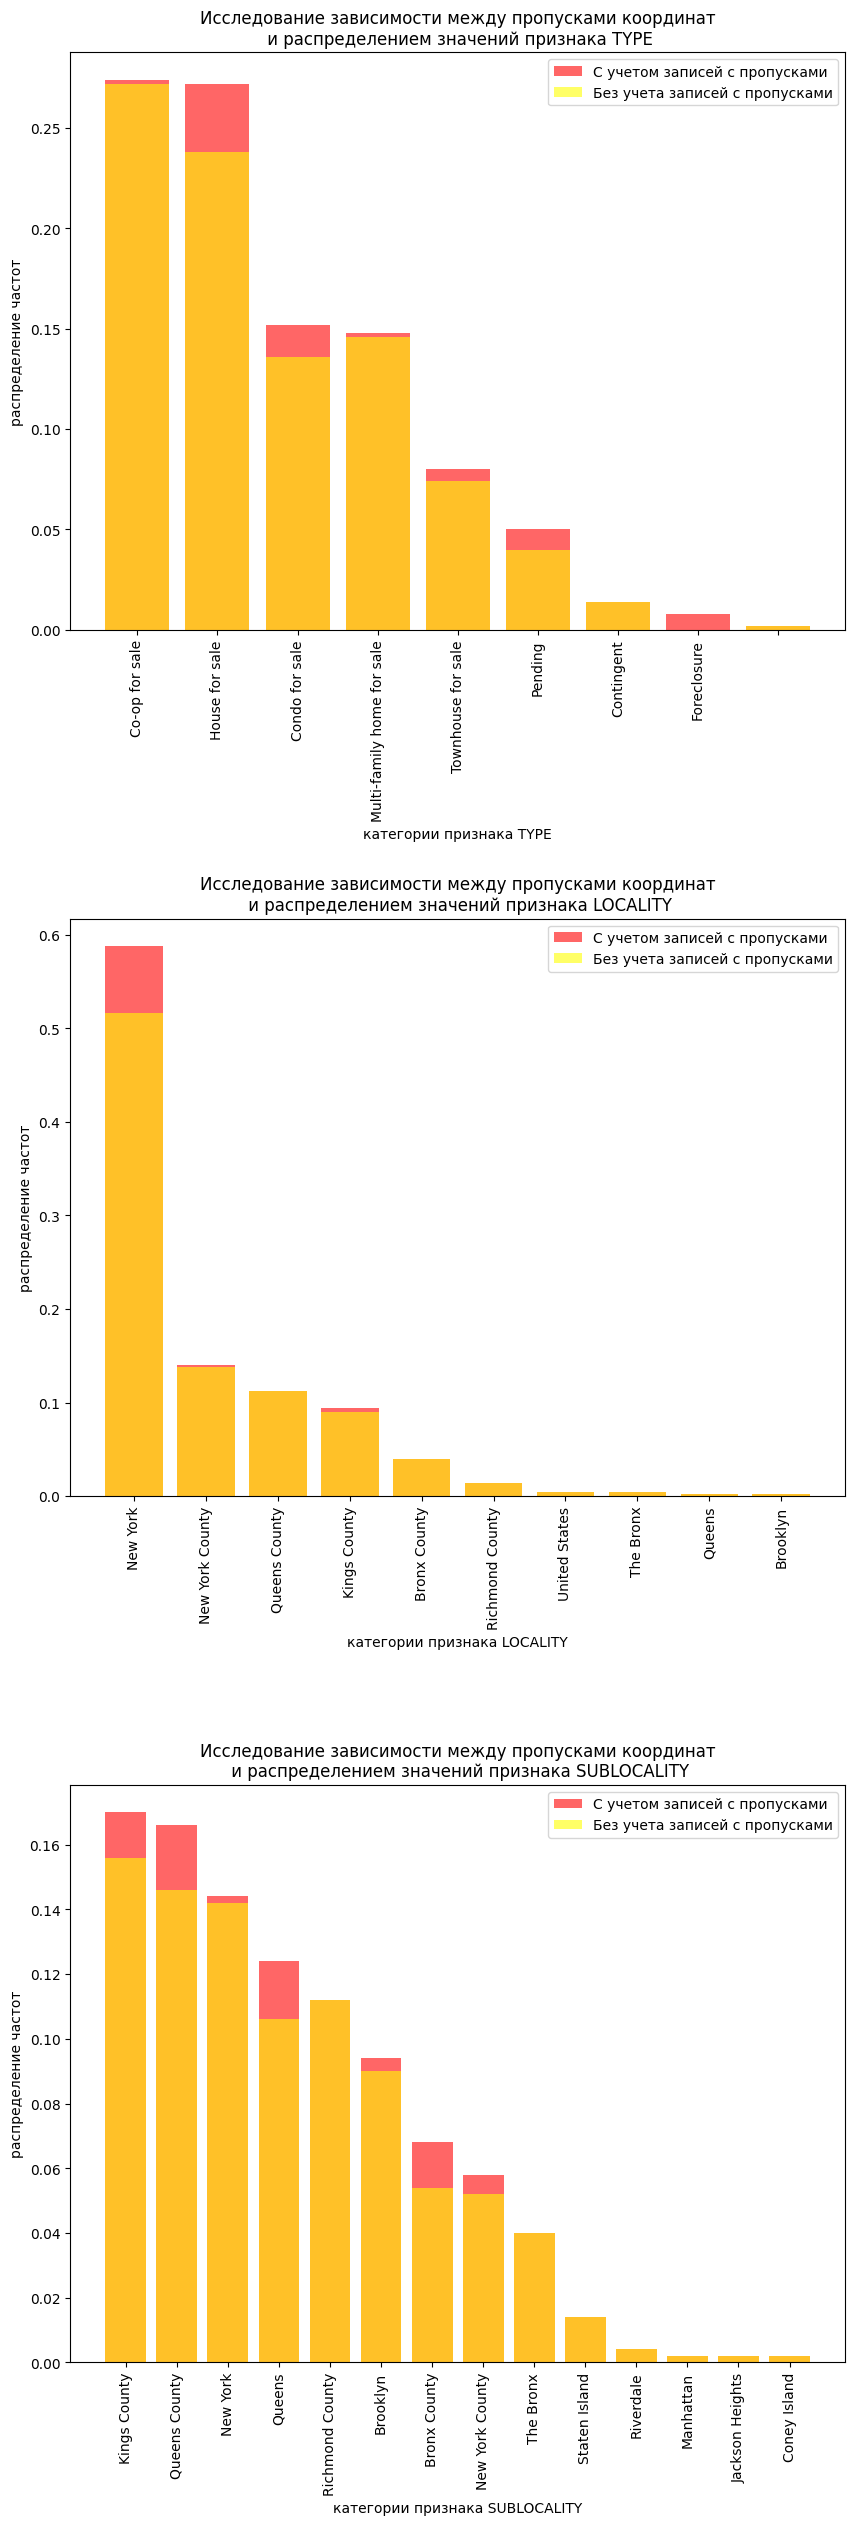

In [9]:
x_names = ["TYPE", "LOCALITY", "SUBLOCALITY"]

fig, ax = plt.subplots(3, 1)
fig.set_size_inches(10, 30)
fig.subplots_adjust(wspace=1, hspace=0.5)
for i, x_name in enumerate(x_names):
    with_null = df[x_name].value_counts()/df.shape[0]
    without_null = df[df['BATH'].notnull()][x_name].value_counts()/df.shape[0]
    x = with_null.keys()
    ax[i].bar(x, with_null, label='С учетом записей с пропусками', alpha=0.6, color="red")
    x = without_null.keys()
    ax[i].bar(x, without_null, label='Без учета записей с пропусками', alpha=0.6, color="yellow")
    ax[i].set_title(f"Исследование зависимости между пропусками координат\n и распределением значений признака {x_name}")
    ax[i].set_xlabel(f"категории признака {x_name}")
    ax[i].set_ylabel("распределение частот")
    ax[i].set_xticklabels(x, rotation=90)
    ax[i].legend()


Можно наблюдать, что количество пропусков сильно разнится от категории к категории. Также, категория Foreclosure признака TYPE полностью состоит из пропусков.  

Вывод: пропуски признаков "BATH", "ADMINISTRATIVE_AREA_LEVEL_2" зависят от значений категориальных признаков "TYPE", "LOCALITY", "SUBLOCALITY".

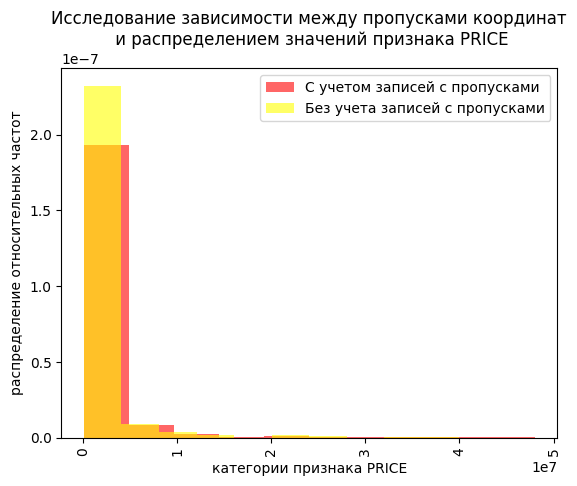

In [10]:
x_name = "PRICE"
with_null = df[x_name]
without_null = df[df['BATH'].notnull()][x_name]

plt.hist(with_null, label='С учетом записей с пропусками', alpha=0.6, color="red", density=True)
plt.hist(without_null, label='Без учета записей с пропусками', alpha=0.6, color="yellow", density=True)
plt.title(f"Исследование зависимости между пропусками координат\n и распределением значений признака {x_name}")
plt.xlabel(f"категории признака {x_name}")
plt.ylabel("распределение относительных частот")
plt.xticks(rotation=90)
plt.legend()

Можно наблюдать различное распределение пропусков "BATH", "ADMINISTRATIVE_AREA_LEVEL_2" для различных ценовых диапазонов.

Выводы: 
- Пропуски в столбцах "BATH", "ADMINISTRATIVE_AREA_LEVEL_2" появляются только совместно. Но причины этого явления не ясны.
- Просматривается явная зависимость между пропусками в этих столбцах и распределением значений признаков в столбцах "TYPE", "LOCALITY", "SUBLOCALITY"; изменения распределения значений столбца "PRICE", тоже присутствует. Пропуски являются существенными.
- Мне трудно определить причины пропусков, но, я предполагаю что эти пропуски можно отнести к категории случайных. Они не могут быть совершенно случайны - тогда бы изменения коснулись всех категорий остальных признаков примерно равномерно. Они не могут быть неслучайными, т.к. колличество ванных комнат - натуральное число, их оценивают визуально, у нас нет таких значений ванных комнат, которые не принадлежали бы натуральным числам и их нельзя было бы посчитать взглядом.
- Количество пропусков в этих столбцах 7.8% от общего числа записей.
- С учетом всех пунктов, допустимой стратегией обработки пропусков является восстановдление пропущенных значений в столбцах "BATH", "ADMINISTRATIVE_AREA_LEVEL_2" (39 записей).

Обработка пропущенных значений. Удалим строки с неизвестными нам координатами.

In [11]:
indexes = df[df['LATITUDE'].isnull()].index
df = df.drop(indexes)
print(f"Размерность: {df.shape}")
df.info()

Размерность: (483, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  483 non-null    object 
 1   TYPE                         483 non-null    object 
 2   PRICE                        483 non-null    int64  
 3   BEDS                         483 non-null    int64  
 4   BATH                         445 non-null    float64
 5   PROPERTYSQFT                 483 non-null    float64
 6   ADDRESS                      483 non-null    object 
 7   STATE                        483 non-null    object 
 8   MAIN_ADDRESS                 483 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  444 non-null    object 
 10  LOCALITY                     483 non-null    object 
 11  SUBLOCALITY                  483 non-null    object 
 12  STREET_NAME                  483 non-null    object 
 13  LO

В лабораторной работе №8 мы исследовали распределение признака "BATH". Т.к. распределение этого признака является островершинным с сильной положительной асимметрией, возможно заменить пропущенные значения на минимальные значения этого признака. 

In [12]:
df['BATH'].fillna(df['BATH'].min(), inplace = True)
print(f"Размерность: {df.shape}")
df.info()

Размерность: (483, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  483 non-null    object 
 1   TYPE                         483 non-null    object 
 2   PRICE                        483 non-null    int64  
 3   BEDS                         483 non-null    int64  
 4   BATH                         483 non-null    float64
 5   PROPERTYSQFT                 483 non-null    float64
 6   ADDRESS                      483 non-null    object 
 7   STATE                        483 non-null    object 
 8   MAIN_ADDRESS                 483 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  444 non-null    object 
 10  LOCALITY                     483 non-null    object 
 11  SUBLOCALITY                  483 non-null    object 
 12  STREET_NAME                  483 non-null    object 
 13  LO

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'United States'),
  Text(1, 0, 'New York'),
  Text(2, 0, 'Bronx County'),
  Text(3, 0, 'New York County'),
  Text(4, 0, 'Queens County'),
  Text(5, 0, 'Kings County'),
  Text(6, 0, '10017')])

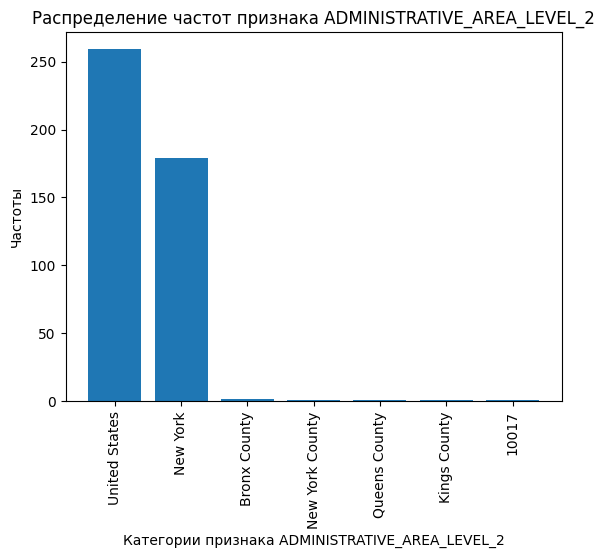

In [13]:
y = df["ADMINISTRATIVE_AREA_LEVEL_2"].value_counts()
x = y.keys()
plt.bar(x, y)
plt.title(f"Распределение частот признака ADMINISTRATIVE_AREA_LEVEL_2")
plt.xlabel(f"Категории признака ADMINISTRATIVE_AREA_LEVEL_2")
plt.ylabel("Частоты")
plt.xticks(rotation=90)

Мы видим, что среди значений преобладают две категории признаков, а также есть некорректная категория "10017". Будем считать, что значения в категории "10017" пропущены. В связи с преобладанием двух категорий принято решение заполнить категории на основе их распределения.

In [14]:
df.loc[df['ADMINISTRATIVE_AREA_LEVEL_2'] == "10017", 'ADMINISTRATIVE_AREA_LEVEL_2'] = np.nan
print(df['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts(), '\n')
values = list(df['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts().index) 
print(values, '\n')
pvalues = list(df['ADMINISTRATIVE_AREA_LEVEL_2'].value_counts())/np.array(df['ADMINISTRATIVE_AREA_LEVEL_2'].count())
print(pvalues)      

ADMINISTRATIVE_AREA_LEVEL_2
United States      259
New York           179
Bronx County         2
New York County      1
Queens County        1
Kings County         1
Name: count, dtype: int64 

['United States', 'New York', 'Bronx County', 'New York County', 'Queens County', 'Kings County'] 

[0.58465011 0.40406321 0.00451467 0.00225734 0.00225734 0.00225734]


In [15]:
repl = np.random.choice(values, df.isnull().sum()['ADMINISTRATIVE_AREA_LEVEL_2'], p=pvalues)
nans = df['ADMINISTRATIVE_AREA_LEVEL_2'].isnull()
df.loc[nans, 'ADMINISTRATIVE_AREA_LEVEL_2'] = repl
print(f"Размерность: {df.shape}")
df.info()

Размерность: (483, 17)
<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  483 non-null    object 
 1   TYPE                         483 non-null    object 
 2   PRICE                        483 non-null    int64  
 3   BEDS                         483 non-null    int64  
 4   BATH                         483 non-null    float64
 5   PROPERTYSQFT                 483 non-null    float64
 6   ADDRESS                      483 non-null    object 
 7   STATE                        483 non-null    object 
 8   MAIN_ADDRESS                 483 non-null    object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  483 non-null    object 
 10  LOCALITY                     483 non-null    object 
 11  SUBLOCALITY                  483 non-null    object 
 12  STREET_NAME                  483 non-null    object 
 13  LO

## Задание 2

In [16]:
rubbish = ["ADDRESS",  "STATE",  "MAIN_ADDRESS",  "LONG_NAME", 
"FORMATTED_ADDRESS", "LATITUDE", "LONGITUDE", "PRICE"]
df = df.drop(columns=rubbish)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 483 entries, 0 to 499
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  483 non-null    object 
 1   TYPE                         483 non-null    object 
 2   BEDS                         483 non-null    int64  
 3   BATH                         483 non-null    float64
 4   PROPERTYSQFT                 483 non-null    float64
 5   ADMINISTRATIVE_AREA_LEVEL_2  483 non-null    object 
 6   LOCALITY                     483 non-null    object 
 7   SUBLOCALITY                  483 non-null    object 
 8   STREET_NAME                  483 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 37.7+ KB


In [17]:
df["BATH"] = df["BATH"].apply(np.int64)

In [18]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer, normalize
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, OneHotEncoder

Я не знаю какой из способов масштабирования лучше выбрать и из презентации и учебного ноутбука я не смог этого понять. При этом, мой взор склоняется в сторону нормализации, потому что мне нравится линейная алгебра.

In [19]:
scaler6 = Normalizer()
df[["BEDS", "BATH", "PROPERTYSQFT"]] = scaler6.fit_transform(df[["BEDS", "BATH", "PROPERTYSQFT"]])
df[["BEDS", "BATH", "PROPERTYSQFT"]]

,BEDS,BATH,PROPERTYSQFT
0,0.001099,0.001099,0.999999
1,0.001719,0.000573,0.999998
2,0.002289,0.003205,0.999992
3,0.001831,0.000458,0.999998
4,0.002820,0.001880,0.999994
...,...,...,...
495,0.002289,0.000916,0.999997
496,0.000916,0.000458,0.999999
497,0.001373,0.000458,0.999999
498,0.001333,0.001333,0.999998


Все категориальные признаки в данном наборе имеют номинальную шкалу - применяю OneHotEncoder

In [20]:
data_ohe = df.copy()
data_ohe.head()

,BROKERTITLE,TYPE,BEDS,BATH,PROPERTYSQFT,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME
0,Brokered by Corcoran Park Slope,House for sale,0.001099,0.001099,0.999999,United States,New York,Kings County,Brooklyn
1,Brokered by JOSK REALTY LLC,Multi-family home for sale,0.001719,0.000573,0.999998,United States,New York,Kings County,Brooklyn
2,Brokered by Corcoran East Side,Townhouse for sale,0.002289,0.003205,0.999992,United States,New York,New York County,New York
3,Brokered by TREBACH REALTY INC,House for sale,0.001831,0.000458,0.999998,United States,New York,Bronx County,The Bronx
4,Brokered by BHHS Fillmore R.E.,House for sale,0.002820,0.001880,0.999994,United States,New York,Kings County,Brooklyn


In [22]:
nominal = ["BROKERTITLE", "TYPE", "ADMINISTRATIVE_AREA_LEVEL_2", "LOCALITY", "SUBLOCALITY", "STREET_NAME"]
for column_name in nominal:
    OHE_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    encoded = OHE_encoder.fit_transform(data_ohe.loc[:, [column_name]])
    data_ohe = data_ohe.join(pd.DataFrame(encoded, columns=OHE_encoder.get_feature_names_out()))
data_ohe = data_ohe.drop(columns=nominal)
data_ohe.head()

,BEDS,BATH,PROPERTYSQFT,BROKERTITLE_Brokered by 1 Oak Real Estate Hub Inc,BROKERTITLE_Brokered by 5 Boro Realty Corp,BROKERTITLE_Brokered by A J Realty Of Queens Inc,BROKERTITLE_Brokered by AAA Young Shuen Realty Inc,BROKERTITLE_Brokered by Akcess24homes Inc,BROKERTITLE_Brokered by All Area Brokerage Inc,BROKERTITLE_Brokered by Amorelli Realty LLC,...,STREET_NAME_Southside,STREET_NAME_Spuyten Duyvil,STREET_NAME_Staten Island,STREET_NAME_Sunset Park,STREET_NAME_Surf Avenue,STREET_NAME_The Bronx,STREET_NAME_West Bronx,STREET_NAME_Williamsburg,STREET_NAME_Woodhaven,STREET_NAME_Woodside
0,0.001099,0.001099,0.999999,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.001719,0.000573,0.999998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002289,0.003205,0.999992,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.001831,0.000458,0.999998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.002820,0.001880,0.999994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
